# Introduction
This subproject involves analysing the use of two data set:
(a). The mental health data which consists of frequency of symptoms during the pandemic
(b). covid data which consits the general parameters regarding covid-19 in the United States
The end goal is to be able to draw conclusion and prediction on the state of mental illness during the pandemic and analyze the dependent and independent variables pertained to it

In [89]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import scipy.stats as st

# import and subset mental health data

In [90]:
#reading in the csv data for mental health between april 23 to July 21
df=pd.read_csv("data_resources/2020IndicatorsofDepression.csv")
df

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2515,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,12,July 16 - July 21,38.3,34.0,42.7,34.0 - 42.7,37.2-40.5
2516,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,12,July 16 - July 21,43.8,39.3,48.5,39.3 - 48.5,43.6-50.2
2517,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,12,July 16 - July 21,37.0,31.4,42.8,31.4 - 42.8,31.8-37.1
2518,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,12,July 16 - July 21,33.3,28.9,37.9,28.9 - 37.9,31.8-37.1


In [91]:
#checking through the group and subgroup columns
df.Group.unique()
df.Subgroup.unique()

array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic white, single race',
       'Non-Hispanic black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina

In [92]:
#picking out the national estimate from the group column 
#then creating a data frame that consists of just indicators of mental illness, week label and values
nat_df=df.loc[df["Group"]=="National Estimate"]
nat_df
new_nat_df=nat_df[["Indicator","Week Label","Value"]]
new_nat_df.head()

,Indicator,Week Label,Value
0,Symptoms of Depressive Disorder,Apr 23 - May 5,23.5
70,Symptoms of Anxiety Disorder,Apr 23 - May 5,30.8
140,Symptoms of Anxiety Disorder or Depressive Dis...,Apr 23 - May 5,35.9
210,Symptoms of Depressive Disorder,May 7 - May 12,24.1
280,Symptoms of Anxiety Disorder,May 7 - May 12,30.0


In [93]:
#creating a dataframe with indicator"Symptoms of Anxiety Disorder or Depressive Disorder"
dep_anx_dfx = new_nat_df.loc[(new_nat_df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')&
                     (new_nat_df['Week Label']) 
                     & (new_nat_df['Value'])]
dep_anx_dfx.reset_index().sort_values("Value", ascending=True)
dep_anx_dfx["Index"]=dep_anx_dfx.index
dep_anx_dfx

#creating a dataframe with indicator"Symptoms of Anxiety Disorder"
anx_df = new_nat_df.loc[(new_nat_df['Indicator'] == 'Symptoms of Anxiety Disorder')&
                     (new_nat_df['Week Label']) 
                     & (new_nat_df['Value'])]
anx_df.reset_index().sort_values("Value", ascending=True)
anx_df["Index"]=anx_df.index
anx_df
#creating a dataframe with indicator"Symptoms of Depressive Disorder"
dep_df = new_nat_df.loc[(new_nat_df['Indicator'] == 'Symptoms of Depressive Disorder')&
                     (new_nat_df['Week Label']) 
                     & (new_nat_df['Value'])]
dep_df.reset_index().sort_values("Value", ascending=True)
dep_df["Index"]=anx_df.index
dep_df


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,Indicator,Week Label,Value,Index
0,Symptoms of Depressive Disorder,Apr 23 - May 5,23.5,70
210,Symptoms of Depressive Disorder,May 7 - May 12,24.1,280
420,Symptoms of Depressive Disorder,May 14 - May 19,24.4,490
630,Symptoms of Depressive Disorder,May 21 - May 26,24.9,700
840,Symptoms of Depressive Disorder,May 28 - June 2,25.3,910
1050,Symptoms of Depressive Disorder,June 4 - June 9,25.8,1120
1260,Symptoms of Depressive Disorder,June 11 - June 16,25.1,1330
1470,Symptoms of Depressive Disorder,June 18 - June 23,25.6,1540
1680,Symptoms of Depressive Disorder,June 25 - June 30,26.9,1750
1890,Symptoms of Depressive Disorder,July 2 - July 7,27.6,1960


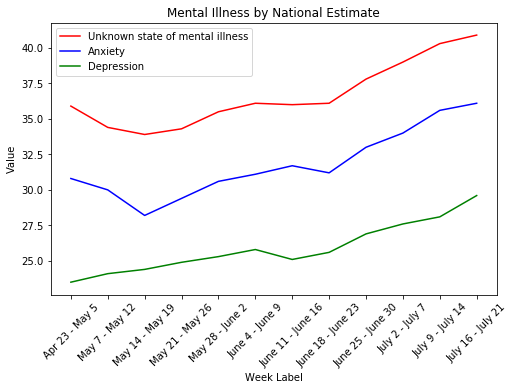

In [94]:
#Plotting the line graph of national estimate against week
y_axisdaf = dep_anx_dfx["Value"]
y_axisanx = anx_df["Value"]
y_axisdep = dep_df["Value"]
x_axisdaf = dep_anx_dfx["Week Label"]
x_axisanx = anx_df["Week Label"]
x_axisdep = dep_df["Week Label"]

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_axisdaf, y_axisdaf, color="red", label="Unknown state of mental illness")
ax.plot(x_axisanx, y_axisanx, color="blue", label="Anxiety")
ax.plot(x_axisdep, y_axisdep, color="green", label="Depression")

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.title('Mental Illness by National Estimate')
plt.xlabel('Week Label')
plt.ylabel('Value')
plt.legend()
plt.show()

# Finding the correlation and relationship between mental health and the surge in covid cases by week

The r-squared is: 0.07671689417201501


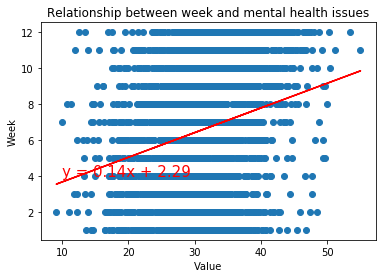

There is a strong positive correlation betweeen mental health issues and increase in week


In [95]:
st.linregress(df["Value"],df["Week"])

x_values = df["Value"]
y_values = df["Week"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,4),fontsize=15,color="red")
plt.xlabel('Value')
plt.ylabel('Week')
plt.title("Relationship between week and mental health issues")
plt.show()
%matplotlib inline
print(f"There is a strong positive correlation betweeen mental health issues and increase in week")

In [96]:
#Creating dictionary for abbreviation of states
#us_state_abbrev["Georgia"] # "GA"
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [97]:
state_df = df.loc[(df['Group']=="By State") & (df['Week'] == 12)]
print(len(state_df))
state_df.head()

153


,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
2329,Symptoms of Depressive Disorder,By State,Alabama,Alabama,12,July 16 - July 21,32.7,27.7,38.0,27.7 - 38.0,32.3-38.6
2330,Symptoms of Depressive Disorder,By State,Alaska,Alaska,12,July 16 - July 21,27.4,22.9,32.2,22.9 - 32.2,26.0-29.3
2331,Symptoms of Depressive Disorder,By State,Arizona,Arizona,12,July 16 - July 21,34.3,29.9,38.9,29.9 - 38.9,32.3-38.6
2332,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,12,July 16 - July 21,33.7,29.8,37.8,29.8 - 37.8,32.3-38.6
2333,Symptoms of Depressive Disorder,By State,California,California,12,July 16 - July 21,31.2,28.2,34.3,28.2 - 34.3,29.4-32.2


In [98]:
new_col = []
for state in state_df["State"]:
    new_col.append(us_state_abbrev[state])
state_df["State"] = new_col
state_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
2329,Symptoms of Depressive Disorder,By State,AL,Alabama,12,July 16 - July 21,32.7,27.7,38.0,27.7 - 38.0,32.3-38.6
2330,Symptoms of Depressive Disorder,By State,AK,Alaska,12,July 16 - July 21,27.4,22.9,32.2,22.9 - 32.2,26.0-29.3
2331,Symptoms of Depressive Disorder,By State,AZ,Arizona,12,July 16 - July 21,34.3,29.9,38.9,29.9 - 38.9,32.3-38.6
2332,Symptoms of Depressive Disorder,By State,AR,Arkansas,12,July 16 - July 21,33.7,29.8,37.8,29.8 - 37.8,32.3-38.6
2333,Symptoms of Depressive Disorder,By State,CA,California,12,July 16 - July 21,31.2,28.2,34.3,28.2 - 34.3,29.4-32.2


# import and subset covid data

In [99]:
#reading cvodi data
covid_df=pd.read_csv("data_resources/Covid_Data.csv")
covid_df

#extracting the covid data between July 16 to July 21 to match with the mental health data
latest_covid_df = covid_df.loc[(covid_df["date"]>=20200716) & (covid_df["date"]<=20200721)]
print(len(latest_covid_df))
latest_covid_df.head()

336


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
896,20200721,AK,2525.0,176101.0,NaN,32.0,NaN,NaN,NaN,1.0,...,178626,0,0,ee5450055a413173129ad034f9098d3f87412492,0,0,0,0,0,NaN
897,20200721,AL,70358.0,530023.0,NaN,1547.0,8538.0,NaN,1009.0,NaN,...,600381,12,170,b2647427b333f419f8b752ae1c13f78474beca6a,0,0,0,0,0,NaN
898,20200721,AR,34655.0,404980.0,NaN,488.0,2257.0,NaN,NaN,111.0,...,439635,17,55,b77efbc4e760c38a840401a8d10f162556ecd753,0,0,0,0,0,NaN
899,20200721,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,0751b91aec0bbed662c9bf6c56ba3fb8cadfa0d1,0,0,0,0,0,NaN
900,20200721,AZ,148683.0,658983.0,NaN,3041.0,6894.0,865.0,NaN,608.0,...,807666,134,196,17596c616e20a48a976b56c45c4a94b1480d5f0c,0,0,0,0,0,NaN


In [100]:
latest_covid_df.tail()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
1227,20200716,VT,1325.0,77715.0,NaN,25.0,NaN,NaN,NaN,NaN,...,79040,0,0,0ca5c119ab41fe078a07093db7ea0fbd4eb57c7a,0,0,0,0,0,NaN
1228,20200716,WA,43046.0,690840.0,NaN,372.0,4829.0,NaN,NaN,53.0,...,733886,17,41,32d6a32746e01df884c2ecaec4ca10ba1666f89b,0,0,0,0,0,NaN
1229,20200716,WI,43139.0,699670.0,154.0,310.0,3968.0,88.0,811.0,NaN,...,742809,4,45,4648619a6c6f1cdd127fefd2aa0080bf380fef88,0,0,0,0,0,NaN
1230,20200716,WV,4657.0,214517.0,NaN,65.0,NaN,29.0,NaN,13.0,...,219174,2,0,7688fc677e8d7f8a456dd90d08b8c06f6a9b41a0,0,0,0,0,0,NaN
1231,20200716,WY,2026.0,41426.0,NaN,18.0,131.0,NaN,NaN,NaN,...,43452,2,0,909ba451a70ee46bbfe0891e2c0211db21949c4f,0,0,0,0,0,NaN


# merge state_df and latest_covid_df

In [101]:
print(state_df.columns)
print(latest_covid_df.columns)

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Week', 'Week Label',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile range'],
      dtype='object')
Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')


In [102]:
#renaming the state column to match both data set
renamed_state_df=state_df.rename(columns={"State":"state"},inplace= False)
renamed_state_df.head()

,Indicator,Group,state,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
2329,Symptoms of Depressive Disorder,By State,AL,Alabama,12,July 16 - July 21,32.7,27.7,38.0,27.7 - 38.0,32.3-38.6
2330,Symptoms of Depressive Disorder,By State,AK,Alaska,12,July 16 - July 21,27.4,22.9,32.2,22.9 - 32.2,26.0-29.3
2331,Symptoms of Depressive Disorder,By State,AZ,Arizona,12,July 16 - July 21,34.3,29.9,38.9,29.9 - 38.9,32.3-38.6
2332,Symptoms of Depressive Disorder,By State,AR,Arkansas,12,July 16 - July 21,33.7,29.8,37.8,29.8 - 37.8,32.3-38.6
2333,Symptoms of Depressive Disorder,By State,CA,California,12,July 16 - July 21,31.2,28.2,34.3,28.2 - 34.3,29.4-32.2


In [103]:
#merging both data set for analysis
merged_data=pd.merge(renamed_state_df[["Indicator","Group","state","Week Label","Value"]], 
                     latest_covid_df[["date","state","positive"]],
                     how ="left",
                     on=['state'])
merged_data

,Indicator,Group,state,Week Label,Value,date,positive
0,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200721,70358.0
1,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200720,68891.0
2,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200719,67011.0
3,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200718,65234.0
4,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200717,63091.0
...,...,...,...,...,...,...,...
913,Symptoms of Anxiety Disorder or Depressive Dis...,By State,WY,July 16 - July 21,41.3,20200720,2187.0
914,Symptoms of Anxiety Disorder or Depressive Dis...,By State,WY,July 16 - July 21,41.3,20200719,2126.0
915,Symptoms of Anxiety Disorder or Depressive Dis...,By State,WY,July 16 - July 21,41.3,20200718,2108.0
916,Symptoms of Anxiety Disorder or Depressive Dis...,By State,WY,July 16 - July 21,41.3,20200717,2069.0


In [104]:
#creating dataframe for depressive symptoms of mental illness
depressive_df=merged_data.loc[merged_data["Indicator"]=="Symptoms of Depressive Disorder"]
depressive_df.head()

,Indicator,Group,state,Week Label,Value,date,positive
0,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200721,70358.0
1,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200720,68891.0
2,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200719,67011.0
3,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200718,65234.0
4,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200717,63091.0


In [105]:
#creating dataframe for anxiety symptoms of mental illness
anxiety_df=merged_data.loc[merged_data["Indicator"]=="Symptoms of Anxiety Disorder"]
anxiety_df.head()

,Indicator,Group,state,Week Label,Value,date,positive
306,Symptoms of Anxiety Disorder,By State,AL,July 16 - July 21,39.9,20200721,70358.0
307,Symptoms of Anxiety Disorder,By State,AL,July 16 - July 21,39.9,20200720,68891.0
308,Symptoms of Anxiety Disorder,By State,AL,July 16 - July 21,39.9,20200719,67011.0
309,Symptoms of Anxiety Disorder,By State,AL,July 16 - July 21,39.9,20200718,65234.0
310,Symptoms of Anxiety Disorder,By State,AL,July 16 - July 21,39.9,20200717,63091.0


In [106]:
#creating dataframe for undefined symptoms of mental illness
dep_anx_df=merged_data.loc[merged_data["Indicator"]=="Symptoms of Anxiety Disorder or Depressive Disorder"]
dep_anx_df.head()

,Indicator,Group,state,Week Label,Value,date,positive
612,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AL,July 16 - July 21,43.3,20200721,70358.0
613,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AL,July 16 - July 21,43.3,20200720,68891.0
614,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AL,July 16 - July 21,43.3,20200719,67011.0
615,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AL,July 16 - July 21,43.3,20200718,65234.0
616,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AL,July 16 - July 21,43.3,20200717,63091.0


# Linear regression and correlation of indicators of mental illness using covid cases by states

The r-squared is: 0.00989110109492202


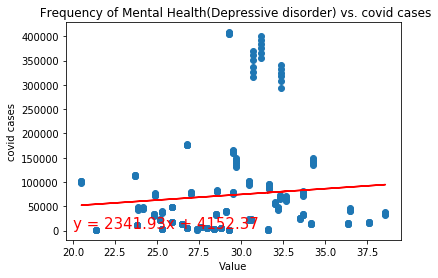

There is a weak positive correlation between depressive people and covid_cases in the state


In [107]:
#linear regression and correlation of depressive disorder
st.linregress(depressive_df["Value"],depressive_df["positive"])

x_values = depressive_df["Value"]
y_values = depressive_df["positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5000),fontsize=15,color="red")
plt.xlabel('Value')
plt.ylabel("covid cases")
plt.title(" Frequency of Mental Health(Depressive disorder) vs. covid cases")
plt.show()

#%matplotlib inline
print(f"There is a weak positive correlation between depressive people and covid_cases in the state")

The r-squared is: 0.021418265646657893


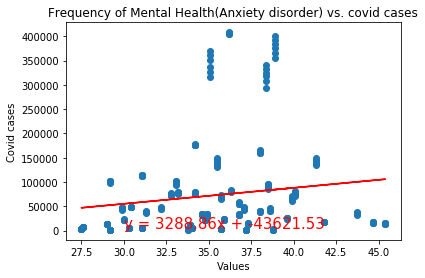

There is a weak positive correlation between anxious people and covid_cases in the state


In [108]:
#linear regression and correlation of anxiety disorder 
st.linregress(anxiety_df["Value"],anxiety_df["positive"])

x_values = anxiety_df["Value"]
y_values = anxiety_df["positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,4000),fontsize=15,color="red")
plt.xlabel('Values')
plt.ylabel('Covid cases')
plt.title("Frequency of Mental Health(Anxiety disorder) vs. covid cases")
plt.show()
%matplotlib inline
print(f"There is a weak positive correlation between anxious people and covid_cases in the state")

The r-squared is: 0.023045784508889052


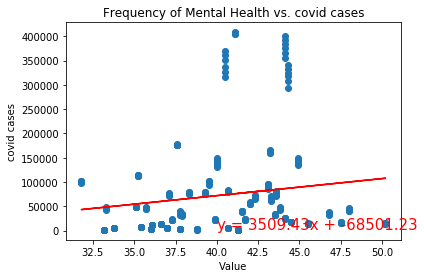

There is a weak positive correlation between people suffering from either mental health generally and covid_cases in the state


In [109]:
#linear regression and correlation of undefined mental illness
st.linregress(dep_anx_df["Value"],dep_anx_df["positive"])

x_values = dep_anx_df["Value"]
y_value = dep_anx_df["positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,2000),fontsize=15,color="red")
plt.xlabel('Value')
plt.ylabel("covid cases")
plt.title("Frequency of Mental Health vs. covid cases")
plt.show()
%matplotlib inline
print(f"There is a weak positive correlation between people suffering from either mental health generally and covid_cases in the state")



# Summary

(a).Line graph was used to show the trajectory of the indicators of mental illness with the
exponential increase in covid cases nationally
(b). The corrrelation of mental health and surge in covid cases was strongly positive
as assummed with a 0.767 coefficient
(c). Descriptive statistics was used to analyze the relationship between indicators
of mental health and covid cases by states. All indicators showed weak
positive correlation with few outliers


# Sources

Covid data: https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm
Mental health: https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm
